In [32]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [33]:
model = joblib.load("crop_model_rf.joblib")
scaler = joblib.load("scaler.joblib")
le = joblib.load("labelencoder.joblib")

In [34]:
data = pd.read_csv("/content/Crop_recommendation.csv")  # adjust path if needed
X = data.drop('label', axis=1)
y = data['label']


In [35]:
y_encoded = le.transform(y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [37]:
X_test_scaled = scaler.transform(X_test)

In [38]:
y_pred = model.predict(X_test_scaled)

In [39]:
print("✅ Model Evaluation Metrics\n")
print(f"Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)} %\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


✅ Model Evaluation Metrics

Accuracy: 99.55 %

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      oran

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


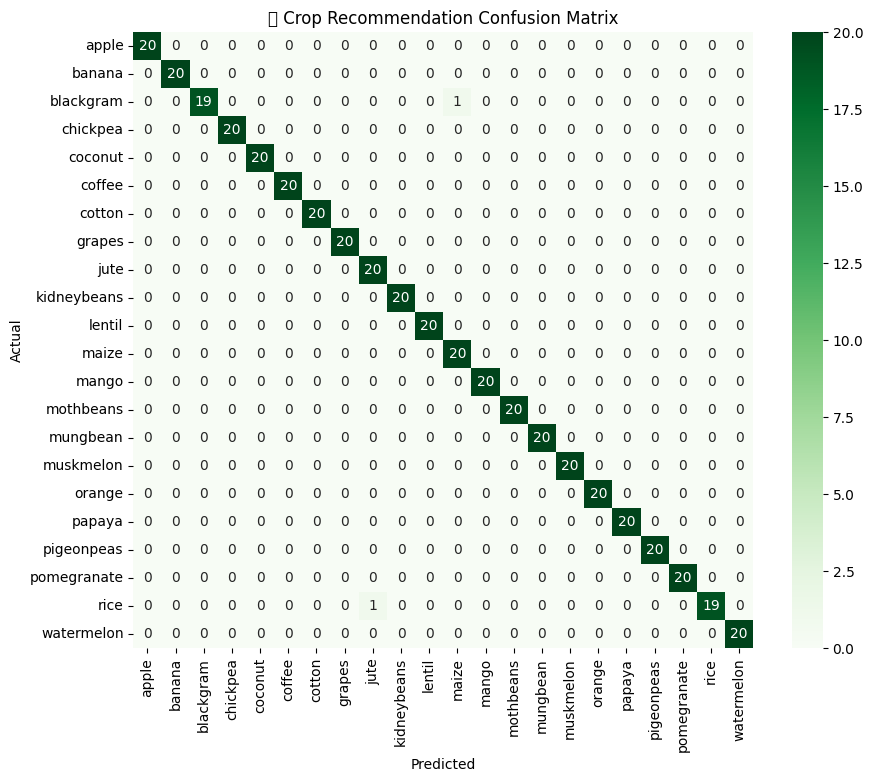

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🌾 Crop Recommendation Confusion Matrix")
plt.show()